# Periodic Orbit Around Lagrange Points

## Given:
You are at a perturbation on $L_1$ at $\xi = 0.01$ and $\eta=0$ for the Earth-Moon system

## Find:
a) When it crosses the x-axis? Is the crossing perpendicular? 

b) What are the IC of periodic orbits? Period? Dimensional and non-dimensional. Propogate it for 2 periods and plot it. 

c) Error in $\vec{x}_f - \vec{x}_e$? Error for the elements? Which is the most accurate state? Can you improve the error?

In [1]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from datetime import timedelta

In [2]:
system = "Earth-Moon"

gamma1, L1 = pn.L1_Newton(SS3.loc[system,'miu'],  0.01)

xi_0    = 0.01
eta_0   = 0
zeta_0  = 0 

U_xx, U_yy, U_zz, U_xy, _, _ = pn.U_ii(L1, 0, 0, SS3.loc[system,'miu']) 

beta_1  = 2 - (U_xx + U_yy)/2
beta_2  = np.sqrt(-U_xx*U_yy)
s       = np.sqrt(beta_1 + np.sqrt(beta_1**2 + beta_2**2))
beta_3  = (s**2 + U_xx)/2/s

xi_dot_0    = eta_0*s/beta_3
eta_dot_0   = -beta_3*xi_0*s
zeta_dot_0  = 0

t_span = [0, np.pi/2]
IC = np.append([L1+xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 

### Part a)


Crossing is perpendicular.


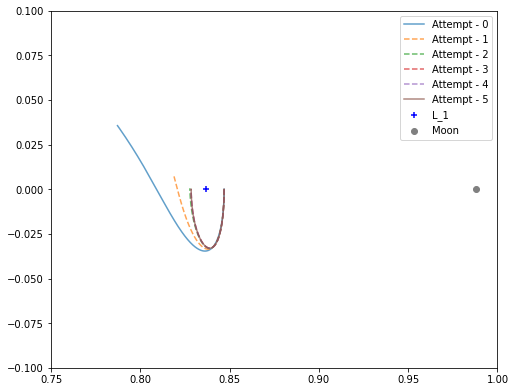

In [3]:
target = {'x_dot_f': 0, 'y_f':0}
changeable = ('y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_per, final_per, tf_per = pn.target(IC[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-10, 
                                      change_tf=True, changeable=changeable, plot=True, attempts=10, axs=axs)


axs.scatter(L1,0, marker = '+', color='blue', label='L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.1, .1])
axs.set_xlim([.75, 1])
axs.set_aspect('equal', 'box')

if int(final_per[3]) == 0 and int(final_per[1]) == 0:
    print("\nCrossing is perpendicular.")

### Part b)

*****  Non-Dimensional  *****
Inital positions:  [0.8469151 0.        0.       ]
Inital velocity:  [ 0.        -0.0782405  0.       ]
Period : 2.709233689804702

 *****  Dimensional  *****
Inital positions (km/s):  [325554.1724379      0.             0.       ]
Inital velocity (km/s):  [ 0.        -0.0801611  0.       ]
Period : 11 days, 18:21:18.088826


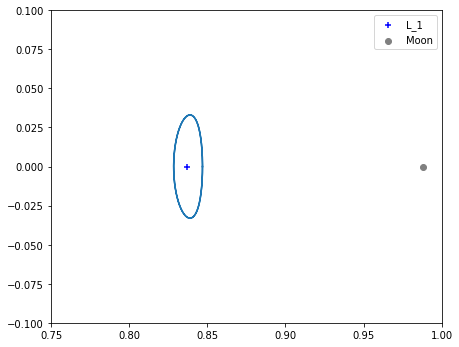

In [4]:
t_span =[0, tf_per*4]

traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC_per[:6], method='RK45',
                      rtol=10**-12, atol=10**-16)

fig, axs = plt.subplots(figsize= (7,7))
axs.plot(traj_perd.y[0,:], traj_perd.y[1,:])
axs.scatter(L1,0, marker = '+', color='blue', label='L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.1, .1])
axs.set_xlim([.75, 1])
axs.set_aspect('equal', 'box')


ICr_dim = pn.L_2_dim(IC_per[:3], SS3.loc[system, 'l*'] )
ICv_dim = IC_per[3:6]* SS3.loc[system, 'l*']/  SS3.loc[system,'t*']

print('*'*5, ' Non-Dimensional ', '*'*5)
print('Inital positions: ', np.round(IC_per[:3],7))
print('Inital velocity: ', np.round(IC_per[3:6],7))
print('Period :', tf_per*2)


print('\n','*'*5, ' Dimensional ', '*'*5)
print('Inital positions (km/s): ', np.round(ICr_dim,7))
print('Inital velocity (km/s): ', np.round(ICv_dim,7))
print('Period :', timedelta(seconds=pn.t_2_dim(tf_per*2, SS3.loc[system, 't*'])))



### Part c)

*****  Non-Dimensional  *****
Error in position y direction: 9.103121360008737e-12
Error in velocity x direction: -4.865137315907507e-11

 *****  Dimensional  *****
Error in position y direction (km): 3.4992398507873584e-06
Error in velocity x direction (km/s): -4.9845611422713495e-11

We have smaller errors in the velocity so they are more accurate
Solution does not converge any better than that.


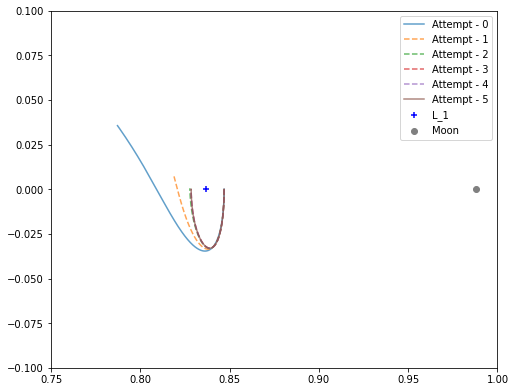

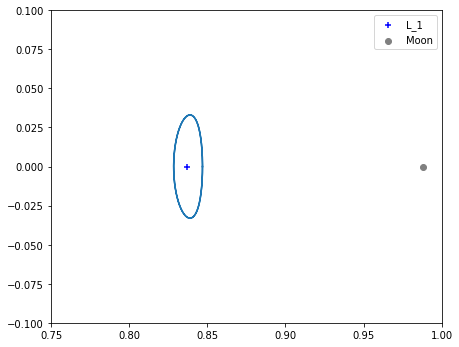

In [5]:
print('*'*5, ' Non-Dimensional ', '*'*5)
print('Error in position y direction:', traj_perd.y[1,-1])
print('Error in velocity x direction:', traj_perd.y[3,-1])

print('\n','*'*5, ' Dimensional ', '*'*5)
print('Error in position y direction (km):', pn.L_2_dim(traj_perd.y[1,-1], SS3.loc[system, 'l*']))
print('Error in velocity x direction (km/s):', traj_perd.y[3,-1]* SS3.loc[system, 'l*']/  SS3.loc[system,'t*'])

print('\nWe have smaller errors in the velocity so they are more accurate')

t_span = [0, np.pi/2]

fig, axs = plt.subplots(figsize= (8,8))
IC_per, final_per, tf_per = pn.target(IC[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-13, 
                                      change_tf=True, changeable=changeable, plot=True, attempts=30, axs=axs)

axs.scatter(L1,0, marker = '+', color='blue', label='L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.1, .1])
axs.set_xlim([.75, 1])
axs.set_aspect('equal', 'box')


t_span = [0, tf_per*4]
traj_perd2 = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC_per[:6], method='RK45',
                      rtol=10**-12, atol=10**-16)

fig, axs = plt.subplots(figsize= (7,7))
axs.plot(traj_perd2.y[0,:], traj_perd.y[1,:])
axs.scatter(L1,0, marker = '+', color='blue', label='L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.1, .1])
axs.set_xlim([.75, 1])
axs.set_aspect('equal', 'box')

print('Solution does not converge any better than that.')
